In [1]:
import yfinance as yf
import pandas as pd

# Download Apple stock data from 2018 to 2023
data = yf.download("AAPL", start="2018-01-01", end="2023-12-31")

# Show first 5 rows
data.head()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4412\1501933379.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2018-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.381001,40.390379,39.677744,39.888723,102223600
2018-01-03,40.373962,40.917816,40.310672,40.444289,118071600
2018-01-04,40.561493,40.664638,40.338796,40.446626,89738400
2018-01-05,41.023308,41.110042,40.566192,40.657615,94640000
2018-01-08,40.870926,41.166292,40.772467,40.870926,82271200


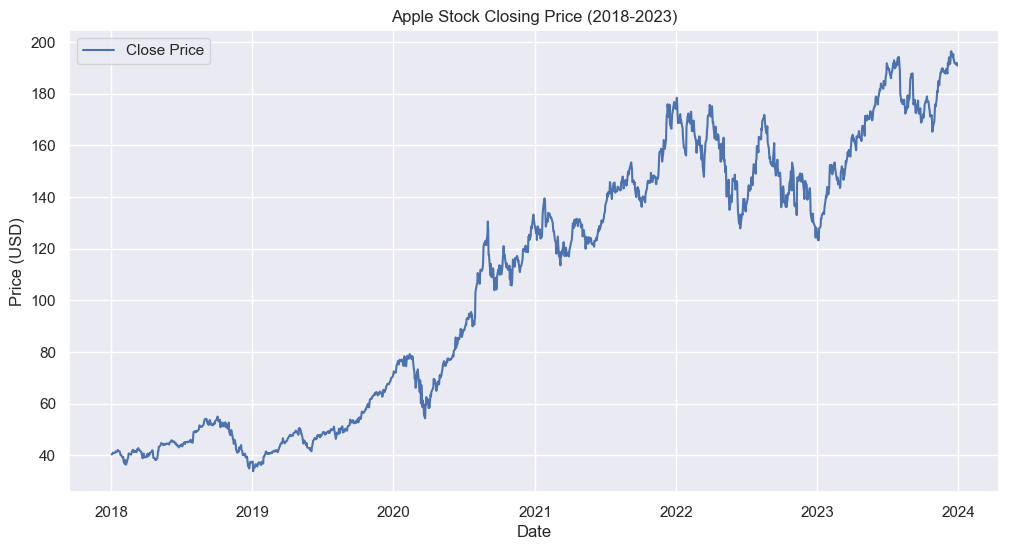

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="darkgrid")

# Plot Closing Price
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price')
plt.title('Apple Stock Closing Price (2018-2023)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


e:\1 ADMIN\Documents\Haridha\time series\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
10:29:12 - cmdstanpy - INFO - Chain [1] start processing
10:29:15 - cmdstanpy - INFO - Chain [1] done processing


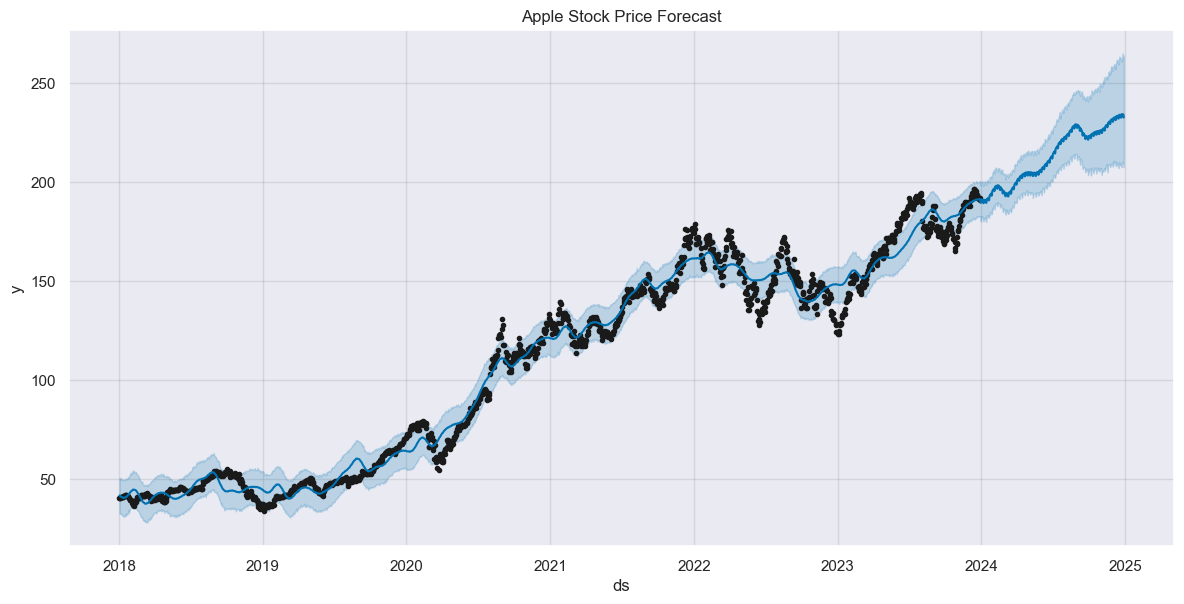

In [3]:
from prophet import Prophet

# Prepare data for Prophet
df = data.reset_index()[['Date', 'Close']]
df.columns = ['ds', 'y']  # Prophet needs columns 'ds' (date) and 'y' (value)

# Initialize and fit model
model = Prophet()
model.fit(df)

# Make future dataframe (next 1 year)
future = model.make_future_dataframe(periods=365)

# Forecast
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast, figsize=(12,6))
plt.title("Apple Stock Price Forecast")
plt.show()


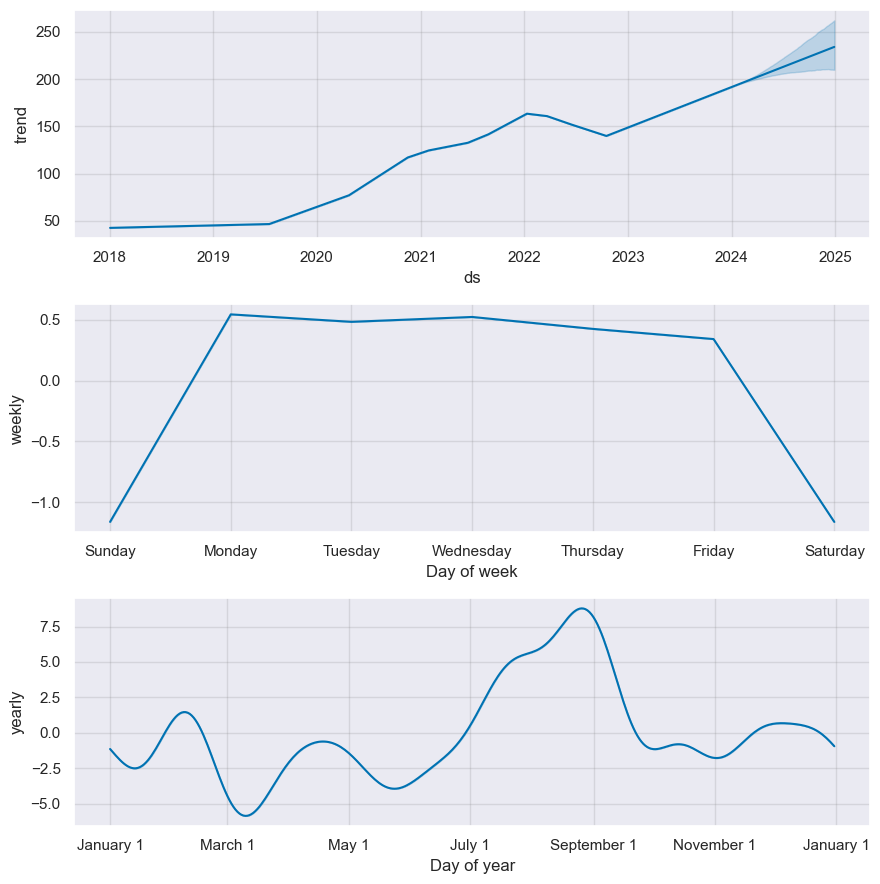

In [4]:
# Forecast components (trend, seasonality)
fig2 = model.plot_components(forecast)
plt.show()


In [3]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Add Closing Price line
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], 
                         mode='lines', name='Close Price'))

# Add Opening Price line (optional)
fig.add_trace(go.Scatter(x=data.index, y=data['Open'], 
                         mode='lines', name='Open Price'))

# Layout
fig.update_layout(title='Apple Stock Prices (Interactive)',
                  xaxis_title='Date',
                  yaxis_title='Price (USD)',
                  template='plotly_dark')

# Show figure
fig.show()


In [3]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Prepare time series
ts = data['Close']

# Fit ARIMA model (example order)
model_arima = ARIMA(ts, order=(5,1,0))
model_arima_fit = model_arima.fit()

# Forecast next 30 days
forecast_arima = model_arima_fit.forecast(30)
forecast_index = pd.date_range(start=ts.index[-1] + pd.Timedelta(days=1), periods=30)

# Combine actual + forecast in Plotly
import plotly.graph_objects as go

fig = go.Figure()

# Actual closing prices
fig.add_trace(go.Scatter(x=ts.index, y=ts, mode='lines', name='Actual Close'))

# ARIMA forecast
fig.add_trace(go.Scatter(x=forecast_index, y=forecast_arima, mode='lines', 
                         name='ARIMA Forecast', line=dict(color='red', dash='dash')))

# Layout
fig.update_layout(title='Apple Stock Actual vs ARIMA Forecast',
                  xaxis_title='Date',
                  yaxis_title='Price (USD)',
                  template='plotly_dark')

fig.show()


e:\1 ADMIN\Documents\Haridha\time series\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

e:\1 ADMIN\Documents\Haridha\time series\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

e:\1 ADMIN\Documents\Haridha\time series\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

e:\1 ADMIN\Documents\Haridha\time series\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

e:\1 ADMIN\Documents\Haridha\time serie

In [4]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objects as go

# Prepare time series with daily frequency
ts = data['Close']
ts.index = pd.to_datetime(ts.index)
ts = ts.asfreq('D')  # Set daily frequency

# Fit ARIMA model
model_arima = ARIMA(ts, order=(5,1,0))
model_arima_fit = model_arima.fit()

# Forecast next 30 days
forecast_arima = model_arima_fit.forecast(30)
forecast_index = pd.date_range(start=ts.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')

# Plotly interactive chart
fig = go.Figure()

# Actual closing prices
fig.add_trace(go.Scatter(x=ts.index, y=ts, mode='lines', name='Actual Close'))

# ARIMA forecast
fig.add_trace(go.Scatter(x=forecast_index, y=forecast_arima, mode='lines', 
                         name='ARIMA Forecast', line=dict(color='red', dash='dash')))

# Layout
fig.update_layout(title='Apple Stock Actual vs ARIMA Forecast',
                  xaxis_title='Date',
                  yaxis_title='Price (USD)',
                  template='plotly_dark')

fig.show()


In [9]:
# --- Prophet Forecast (assuming you already have it) ---
from prophet import Prophet

# Prepare data for Prophet
df_prophet = ts.reset_index()
df_prophet.columns = ['ds', 'y']

prophet_model = Prophet(daily_seasonality=True)
prophet_model.fit(df_prophet)

future = prophet_model.make_future_dataframe(periods=30)
forecast_prophet = prophet_model.predict(future)

# Only take the last 30 days
prophet_forecast = forecast_prophet[['ds', 'yhat']].tail(30)
prophet_index = prophet_forecast['ds']
prophet_values = prophet_forecast['yhat']

# --- Plotly Combined Chart ---
fig = go.Figure()

# Actual prices
fig.add_trace(go.Scatter(x=ts.index, y=ts, mode='lines', name='Actual Close'))

# ARIMA forecast
fig.add_trace(go.Scatter(x=forecast_index, y=forecast_arima, mode='lines', 
                         name='ARIMA Forecast', line=dict(color='red', dash='dash')))

# LSTM forecast
fig.add_trace(go.Scatter(x=forecast_index, y=lstm_forecast.flatten(), mode='lines', 
                         name='LSTM Forecast', line=dict(color='green', dash='dot')))

# Prophet forecast
fig.add_trace(go.Scatter(x=prophet_index, y=prophet_values, mode='lines', 
                         name='Prophet Forecast', line=dict(color='orange', dash='longdash')))

# Layout
fig.update_layout(title='Apple Stock: Actual vs Forecast (ARIMA, LSTM, Prophet)',
                  xaxis_title='Date',
                  yaxis_title='Price (USD)',
                  template='plotly_dark')

fig.show()


12:22:05 - cmdstanpy - INFO - Chain [1] start processing
12:22:06 - cmdstanpy - INFO - Chain [1] done processing


NameError: name 'lstm_forecast' is not defined

In [5]:
import plotly.graph_objects as go

# --- Final Combined Interactive Plotly Chart ---

fig = go.Figure()

# 1️⃣ Actual closing prices
fig.add_trace(go.Scatter(x=ts.index, y=ts, 
                         mode='lines', name='Actual Close'))

# 2️⃣ ARIMA forecast
fig.add_trace(go.Scatter(x=forecast_index, y=forecast_arima, 
                         mode='lines', name='ARIMA Forecast', 
                         line=dict(color='red', dash='dash')))

# 3️⃣ LSTM forecast
fig.add_trace(go.Scatter(x=forecast_index, y=lstm_forecast.flatten(), 
                         mode='lines', name='LSTM Forecast', 
                         line=dict(color='green', dash='dot')))

# 4️⃣ Prophet forecast
fig.add_trace(go.Scatter(x=prophet_index, y=prophet_values, 
                         mode='lines', name='Prophet Forecast', 
                         line=dict(color='orange', dash='longdash')))

# Layout customization
fig.update_layout(
    title='Apple Stock Prices: Actual vs Forecast (ARIMA, LSTM, Prophet)',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    template='plotly_dark',
    hovermode='x unified'
)

# Show interactive chart
fig.show()



NameError: name 'lstm_forecast' is not defined

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4412\774010755.py:17: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed
e:\1 ADMIN\Documents\Haridha\time series\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

e:\1 ADMIN\Documents\Haridha\time series\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

e:\1 ADMIN\Documents\Haridha\time series\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

e:\1 ADMIN\Documents\Haridha\time series\venv\Lib\sit

Epoch 1/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - loss: 0.0471
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0058
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0031
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0018
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0012
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


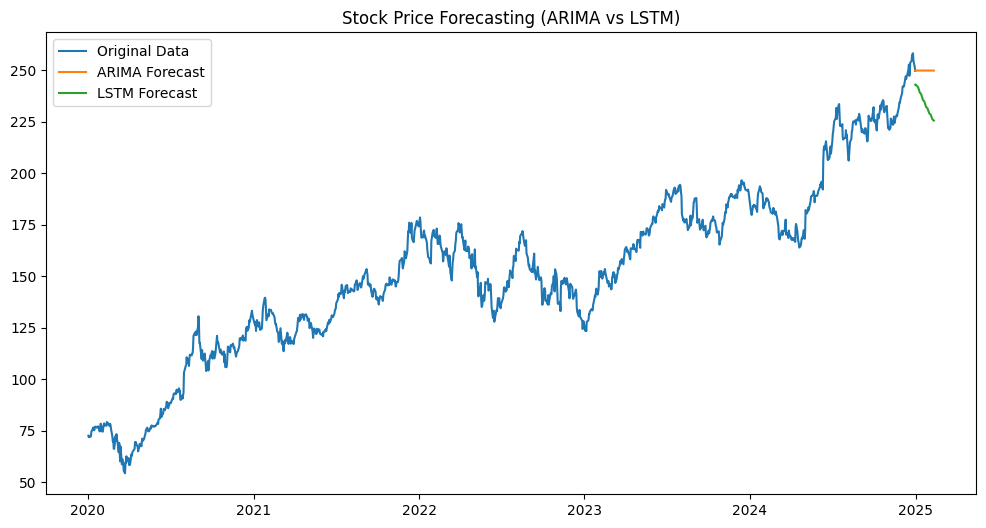

In [9]:
# ==============================
# 📌 Stock Price Forecasting (ARIMA + LSTM)
# ==============================

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# -------------------------------
# STEP 1: Download stock data
# -------------------------------
df = yf.download("AAPL", start="2020-01-01", end="2025-01-01")
ts = df["Close"]

# -------------------------------
# STEP 2: ARIMA Forecast
# -------------------------------
arima_model = ARIMA(ts, order=(5,1,0))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=30)  # forecast next 30 days

# -------------------------------
# STEP 3: LSTM Forecast
# -------------------------------

# Prepare data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(np.array(ts).reshape(-1,1))

train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step,1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mean_squared_error")

# Train model
model.fit(X_train, y_train, batch_size=64, epochs=5, verbose=1)

# Predict
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Forecast future (next 30 days)
x_input = test[len(test)-time_step:].reshape(1,-1)
temp_input = list(x_input[0])
lst_output = []

for i in range(30):  # forecast next 30 days
    if len(temp_input) > time_step:
        x_input = np.array(temp_input[-time_step:])
        x_input = x_input.reshape(1, time_step, 1)
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
    else:
        x_input = x_input.reshape(1, time_step, 1)
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])

lstm_forecast = scaler.inverse_transform(np.array(lst_output).reshape(-1,1))

# -------------------------------
# STEP 4: Plot results
# -------------------------------
plt.figure(figsize=(12,6))
plt.plot(ts.index, ts, label="Original Data")
plt.plot(pd.date_range(ts.index[-1], periods=30, freq="B"), arima_forecast, label="ARIMA Forecast")
plt.plot(pd.date_range(ts.index[-1], periods=30, freq="B"), lstm_forecast, label="LSTM Forecast")
plt.legend()
plt.title("Stock Price Forecasting (ARIMA vs LSTM)")
plt.show()


In [10]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objects as go

# 1️⃣ Download stock data (Apple here)
data = yf.download("AAPL", start="2018-01-01", end="2023-01-01")
ts = data["Close"]

# 2️⃣ Train ARIMA model
model = ARIMA(ts, order=(5,1,0))  
model_fit = model.fit()

# 3️⃣ Forecast next 30 days
forecast = model_fit.forecast(steps=30)

# Create index for forecast dates
forecast_index = pd.date_range(start=ts.index[-1] + pd.Timedelta(days=1), 
                               periods=30, freq='B')  # 'B' = business days

# 4️⃣ Plot with Plotly (interactive)
fig = go.Figure()

# Actual closing prices
fig.add_trace(go.Scatter(x=ts.index, y=ts, 
                         mode='lines', name='Actual Close'))

# Forecast prices
fig.add_trace(go.Scatter(x=forecast_index, y=forecast, 
                         mode='lines', name='ARIMA Forecast', 
                         line=dict(color='red', dash='dash')))

fig.update_layout(title="Apple Stock Price Forecast with ARIMA",
                  xaxis_title="Date", yaxis_title="Price (USD)",
                  template="plotly_dark")

fig.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4412\2092783279.py:7: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed
e:\1 ADMIN\Documents\Haridha\time series\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

e:\1 ADMIN\Documents\Haridha\time series\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

e:\1 ADMIN\Documents\Haridha\time series\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

e:\1 ADMIN\Documents\Haridha\time series\venv\Lib\sit

In [ ]:
# streamlit_app.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import streamlit as st

from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

st.title("📈 Time Series Forecasting Dashboard")
st.markdown("### Compare ARIMA, Prophet, and LSTM with Confidence Intervals")

# ------------------ Data ------------------
st.sidebar.header("Upload Data")
file = st.sidebar.file_uploader("Upload CSV", type=["csv"])

if file is None:
    st.warning("Please upload a CSV file with 'Date' and 'Value' columns.")
    st.stop()

df = pd.read_csv(file)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

st.write("### Preview of Data")
st.dataframe(df.head())

# ------------------ Parameters ------------------
horizon = st.sidebar.slider("Forecast Horizon (days)", 10, 100, 30)

# ------------------ ARIMA ------------------
model_arima = ARIMA(df['Value'], order=(5,1,0))
fit_arima = model_arima.fit()
forecast_arima = fit_arima.get_forecast(steps=horizon)
mean_arima = forecast_arima.predicted_mean
conf_int_arima = forecast_arima.conf_int()

# ------------------ Prophet ------------------
prophet_df = df.rename(columns={'Date':'ds','Value':'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_df)
future = prophet_model.make_future_dataframe(periods=horizon)
forecast_prophet = prophet_model.predict(future)

# ------------------ LSTM ------------------
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['Value']])

X, y = [], []
for i in range(5, len(scaled)):
    X.append(scaled[i-5:i, 0])
    y.append(scaled[i, 0])
X, y = np.array(X), np.array(y)
X = X.reshape(X.shape[0], X.shape[1], 1)

model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1],1)),
    LSTM(50),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X, y, epochs=5, batch_size=1, verbose=0)

last_5 = scaled[-5:].reshape(1,5,1)
lstm_preds = []
for _ in range(horizon):
    pred = model_lstm.predict(last_5, verbose=0)
    lstm_preds.append(pred[0,0])
    last_5 = np.append(last_5[:,1:,:], [[pred]], axis=1)
lstm_preds = scaler.inverse_transform(np.array(lstm_preds).reshape(-1,1))

# ------------------ Plot ------------------
fig = go.Figure()

# Actual data
fig.add_trace(go.Scatter(x=df['Date'], y=df['Value'], mode='lines', name='Actual'))

# ARIMA forecast + interval
future_dates_arima = pd.date_range(df['Date'].iloc[-1], periods=horizon+1, freq='D')[1:]
fig.add_trace(go.Scatter(x=future_dates_arima, y=mean_arima, mode='lines', name='ARIMA Forecast'))
fig.add_trace(go.Scatter(
    x=list(future_dates_arima)+list(future_dates_arima[::-1]),
    y=list(conf_int_arima.iloc[:,0])+list(conf_int_arima.iloc[:,1][::-1]),
    fill='toself', fillcolor='rgba(0,100,250,0.2)',
    line=dict(color='rgba(255,255,255,0)'), name='ARIMA 95% CI'
))

# Prophet forecast + interval
fig.add_trace(go.Scatter(x=forecast_prophet['ds'], y=forecast_prophet['yhat'], mode='lines', name='Prophet Forecast'))
fig.add_trace(go.Scatter(
    x=list(forecast_prophet['ds'])+list(forecast_prophet['ds'][::-1]),
    y=list(forecast_prophet['yhat_lower'])+list(forecast_prophet['yhat_upper'][::-1]),
    fill='toself', fillcolor='rgba(250,100,100,0.2)',
    line=dict(color='rgba(255,255,255,0)'), name='Prophet 95% CI'
))

# LSTM forecast
future_dates_lstm = pd.date_range(df['Date'].iloc[-1], periods=horizon+1, freq='D')[1:]
fig.add_trace(go.Scatter(x=future_dates_lstm, y=lstm_preds.flatten(), mode='lines', name='LSTM Forecast'))

fig.update_layout(title="Forecast Comparison", xaxis_title="Date", yaxis_title="Value")
st.plotly_chart(fig, use_container_width=True)
